In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=8,5
plt.rcParams['figure.dpi']=200
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [44]:
df=pd.read_csv('LoanApprovalPrediction.csv')

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA

In [52]:
categorical_columns=df.select_dtypes(exclude='number')

In [54]:
categorical_columns

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
593,LP002978,Female,No,Graduate,No,Rural,Y
594,LP002979,Male,Yes,Graduate,No,Rural,Y
595,LP002983,Male,Yes,Graduate,No,Urban,Y
596,LP002984,Male,Yes,Graduate,No,Urban,Y


In [56]:
numerical_columns=df.select_dtypes(include='number')

In [58]:
numerical_columns

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...
593,0.0,2900,0.0,71.0,360.0,1.0
594,3.0,4106,0.0,40.0,180.0,1.0
595,1.0,8072,240.0,253.0,360.0,1.0
596,2.0,7583,0.0,187.0,360.0,1.0


In [64]:
#As Loan_ID is completely unique and not correlated with any of the other column

df.drop(columns=['Loan_ID'],inplace=True)

In [60]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [48]:
df.duplicated().sum() # checking duplicate values

0

In [50]:
df.isna().sum() # checking null values

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
# as checked only Dependents ,LoanAmount , Loan_Amount_Term and Credit_History contain null values.
# so we can fill it by mean of same column.
for i in ['Dependents' ,'LoanAmount' , 'Loan_Amount_Term' , 'Credit_History']:
    df[i]=df[i].fillna(df[i].mean())

In [68]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

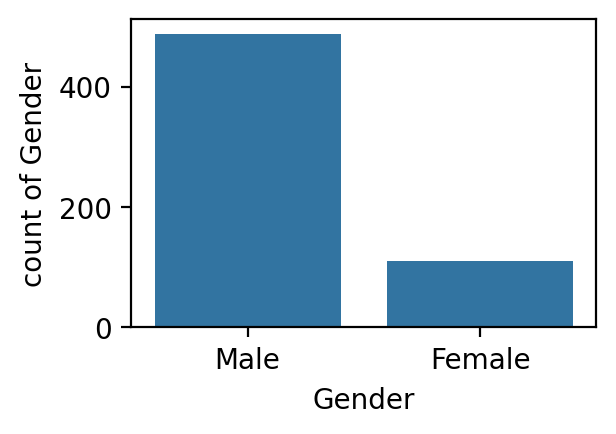

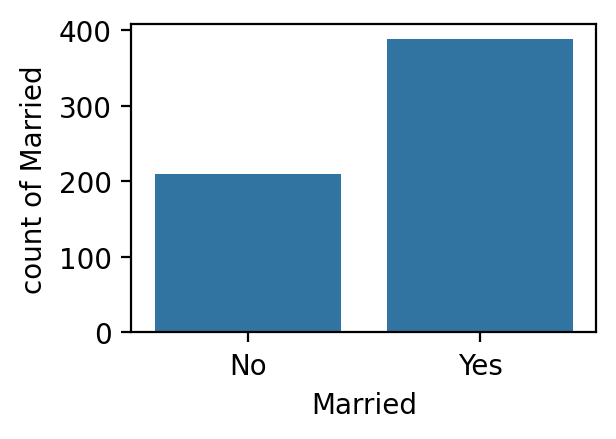

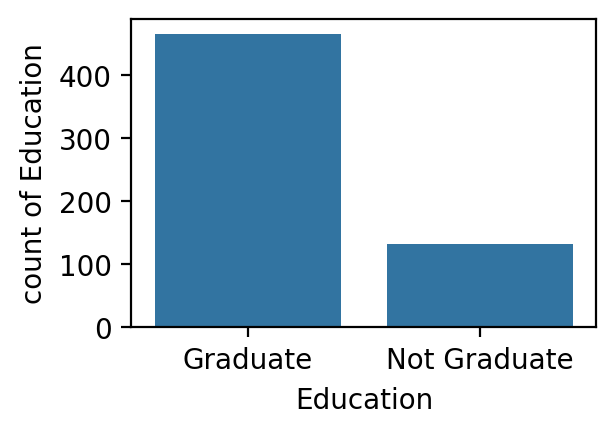

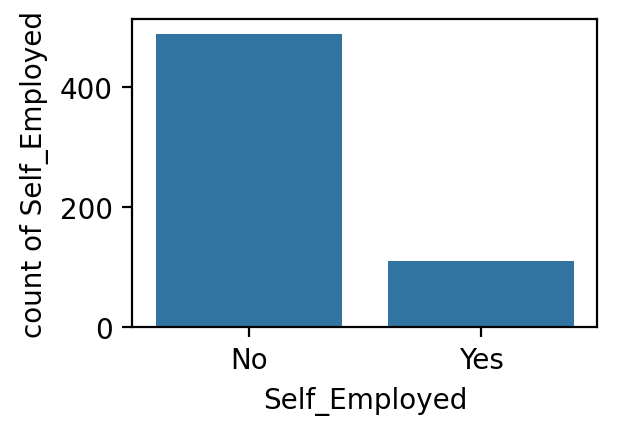

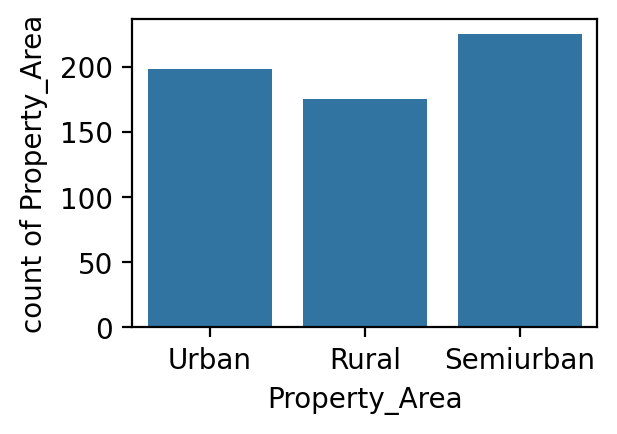

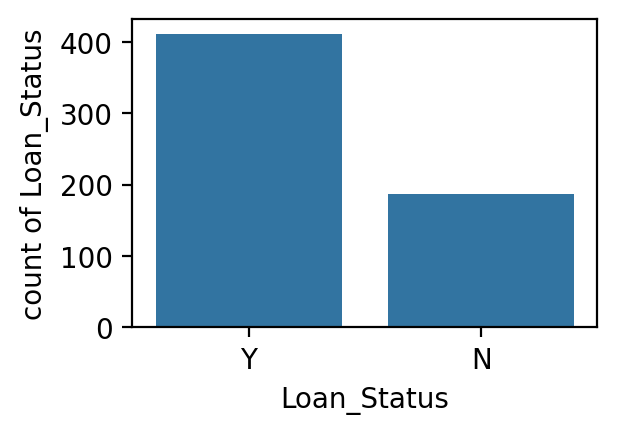

In [137]:
index=1
for i in df.select_dtypes(exclude='number').columns:
    sns.countplot(x=df[i])
    plt.ylabel(F'count of {i}')
    plt.show()
    

In [151]:
#Scalling & encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [153]:
le=LabelEncoder()

In [155]:
for i in df.select_dtypes(exclude='number').columns:
    df[i]=le.fit_transform(df[i])

In [157]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
594,1,1,3.0,0,0,4106,0.0,40.000000,180.0,1.0,0,1
595,1,1,1.0,0,0,8072,240.0,253.000000,360.0,1.0,2,1
596,1,1,2.0,0,0,7583,0.0,187.000000,360.0,1.0,2,1


<Axes: >

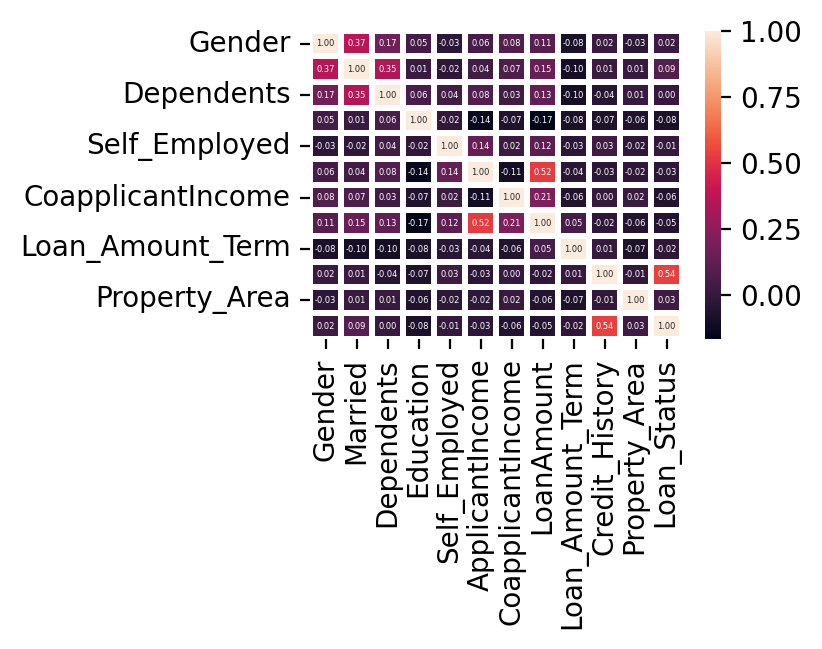

In [227]:
#Now all columns are in numeric format
sns.heatmap(df.corr(),fmt='.2f',annot_kws={"size": 3},annot=True,linewidths=2)


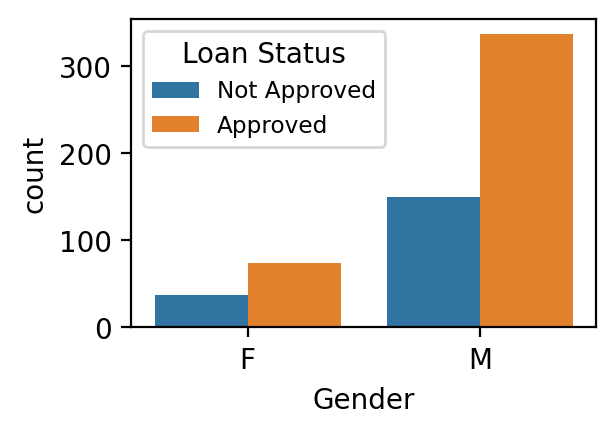

In [291]:
#let's check gender status wise loan status
sns.countplot(x='Gender', data=df,hue=df['Loan_Status'])
plt.xticks(ticks=[0, 1], labels=['F', 'M'])
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'],fontsize='small')

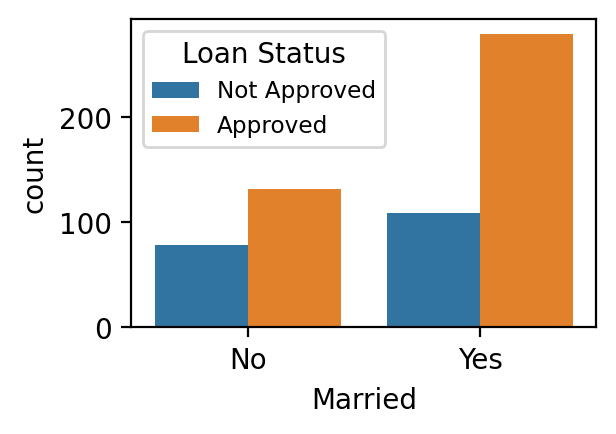

In [293]:
#let's check marital status wise loan status
sns.countplot(x='Married', data=df,hue=df['Loan_Status'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'],fontsize='small')

In [304]:
# defining independent feature(x) and target feature(y)

x=df.iloc[:,:-1]
y=df['Loan_Status']

In [306]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1.0,0
594,1,1,3.0,0,0,4106,0.0,40.000000,180.0,1.0,0
595,1,1,1.0,0,0,8072,240.0,253.000000,360.0,1.0,2
596,1,1,2.0,0,0,7583,0.0,187.000000,360.0,1.0,2


In [308]:
y

0      1
1      0
2      1
3      1
4      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 598, dtype: int32

In [312]:
#Scalling
sc=StandardScaler()

In [314]:
x_scaled=sc.fit_transform(x)

In [316]:
x_scaled

array([[ 0.47741604, -1.35927151, -0.75844733, ...,  0.28085351,
         0.44980383,  1.21892908],
       [ 0.47741604,  0.73568819,  0.24482611, ...,  0.28085351,
         0.44980383, -1.31644341],
       [ 0.47741604,  0.73568819, -0.75844733, ...,  0.28085351,
         0.44980383,  1.21892908],
       ...,
       [ 0.47741604,  0.73568819,  0.24482611, ...,  0.28085351,
         0.44980383,  1.21892908],
       [ 0.47741604,  0.73568819,  1.24809956, ...,  0.28085351,
         0.44980383,  1.21892908],
       [-2.09460913, -1.35927151, -0.75844733, ...,  0.28085351,
        -2.4216183 , -0.04875716]])

In [320]:
# splitting date for testing and training purpose
from sklearn.model_selection import train_test_split

In [322]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2, random_state=42)

# Model Training

In [359]:

#As this is a classification problem so we will use RandomForestClassifiers  : 


In [333]:

from sklearn.ensemble import RandomForestClassifier


In [365]:

rfc=RandomForestClassifier()
model=rfc.fit(xtrain,ytrain)
print('Training accuracy: ',model.score(xtrain,ytrain))
print('Testing accuracy: ',model.score(xtest,ytest))

Training accuracy:  1.0
Testing accuracy:  0.7916666666666666


In [363]:
ypred=model.predict(xtest)

# Evalution

In [372]:
from sklearn.metrics import classification_report

In [374]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.73      0.46      0.56        35
           1       0.81      0.93      0.86        85

    accuracy                           0.79       120
   macro avg       0.77      0.69      0.71       120
weighted avg       0.78      0.79      0.78       120



In [377]:
#As checked 

In [379]:
# Hyperparameter Tunning

In [381]:
from sklearn.model_selection import GridSearchCV

In [393]:
param={'n_estimators':[10,20,50,75,100],
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,9,11,13,15]}


grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [10, 20, 50, 75, 100]})

In [397]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 50}

In [403]:
grid.best_score_

0.8138596491228072

# Final Model

In [405]:
final_model=RandomForestClassifier(criterion= 'gini', max_depth= 7, n_estimators= 50)
final_model.fit(xtrain,ytrain)
final_ypred=final_model.predict(xtest)

In [407]:
print(classification_report(ytest,final_ypred))

              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.80      0.99      0.88        85

    accuracy                           0.82       120
   macro avg       0.87      0.69      0.72       120
weighted avg       0.84      0.82      0.79       120



In [ ]:
Random Forest Classifier is giving an accuracy score of 82% for the testing dataset.